<a href="https://colab.research.google.com/github/Meli10/AI-Image-Classification/blob/master/ImageClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description : This program is going to classify images

In [0]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
#Loading the data.
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [13]:
#Looking at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
#Getting the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [19]:
#Taking a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

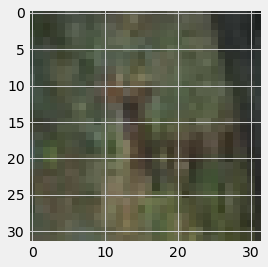

In [20]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [22]:
#Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [21]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The  image class is:', classification[y_train[index][0]])

The  image class is: deer


In [0]:
#Converting the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
#Printing the new labels
print(y_train_one_hot)

In [25]:
#Print new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
#Normalizing the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255


In [0]:
x_train[index]

In [0]:
#Creating the models architecture
model = Sequential()

#Adding the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Adding a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Adding another convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#Adding another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Adding a flattening layer
model.add(Flatten())

#Adding a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Adding a drop out layer
model.add(Dropout(0.5))

#Adding a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Adding a drop out layer
model.add(Dropout(0.5))

#Adding a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Adding a layer with 10 neurons
model.add(Dense(10, activation='softmax'))



In [0]:
#Compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [66]:
#Training model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.3349 - accuracy: 0.8881 - val_loss: 1.0924 - val_accuracy: 0.6922
Epoch 2/10
40000/40000 [==============================] - 57s 1ms/step - loss: 0.2788 - accuracy: 0.9065 - val_loss: 1.1556 - val_accuracy: 0.6907
Epoch 3/10
40000/40000 [==============================] - 57s 1ms/step - loss: 0.2724 - accuracy: 0.9075 - val_loss: 1.2386 - val_accuracy: 0.6859
Epoch 4/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.2534 - accuracy: 0.9126 - val_loss: 1.1748 - val_accuracy: 0.6926
Epoch 5/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.2497 - accuracy: 0.9144 - val_loss: 1.1945 - val_accuracy: 0.6960
Epoch 6/10
40000/40000 [==============================] - 58s 1ms/step - loss: 0.2313 - accuracy: 0.9197 - val_loss: 1.2084 - val_accuracy: 0.6862
Epoch 7/10
40000/40000 [==============================] - 62s 2ms/st

In [68]:
#Evaluating the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]


10000/10000 [==============================] - 6s 565us/step


0.682699978351593

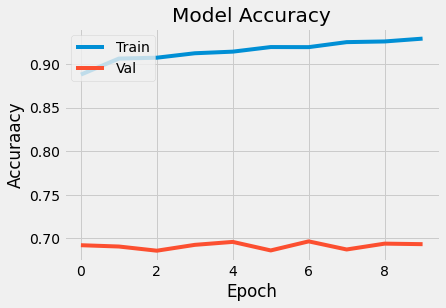

In [69]:
#Visualizing the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

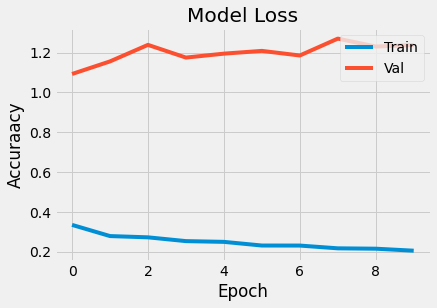

In [70]:
#Visualizing the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuraacy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [58]:
#Testing the model with an example
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog (1).jpg


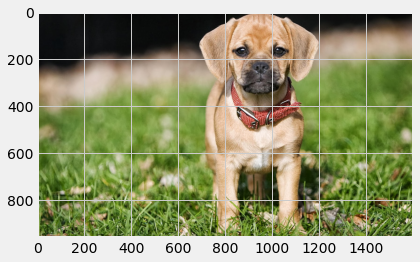

In [60]:
#Show the image
new_image = plt.imread('dog (1).jpg')
img = plt.imshow(new_image)

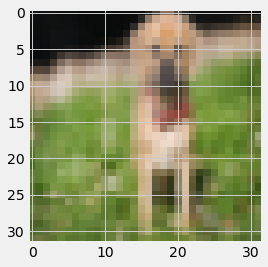

In [61]:
#Resizing image to be 32x32
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [62]:
#Getting the models predictions
predictions = model.predict(np.array([resized_image]))
#Showing the predictions
predictions

array([[5.4681720e-07, 2.3201574e-07, 5.9793337e-04, 1.3312419e-03,
        7.2829224e-02, 9.2508173e-01, 1.1361192e-05, 1.4665694e-04,
        4.6631371e-07, 5.2226000e-07]], dtype=float32)

In [63]:
#Now sorting predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp =list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Showing the sorted labels in order
print(list_index)

[5, 4, 3, 2, 7, 6, 0, 9, 8, 1]


In [67]:
#Printing the first 5 predictions
for i in range (5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

dog : 92.51 %
deer : 7.28 %
cat : 0.13 %
bird : 0.06 %
horse : 0.01 %
